# Fluorescence Recovery After Photobleaching

In [1]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python
from scipy.optimize import leastsq #for least squares fitting

%matplotlib inline
import mpld3 #For making nice looking plots
from mpld3 import plugins
mpld3.enable_notebook()
import matplotlib
from matplotlib import pylab

#For making interactive user interfaces (buttons and sliders and such)
import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

#Loading the particle tracking software
import sys
sys.path.append("Z:\\Code\\BeadTracking\\track") #Locate code
import tiff_file #Ignore any warnings importing this may cause

Z:\Code\BeadTracking\track\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
Z:\Code\BeadTracking\track\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
Z:\Code\BeadTracking\track\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


## Specify location of data

In [59]:
#Now let's locate the data
data_directory = "Z:\\2017-08-28_pnipam-xan\\0828rm02\\"
data_file = "20x_2fps_FRAP_ContPhase_006_ch1.tif"

## Identify where bleaching occurs

(302L, 256L, 256L)


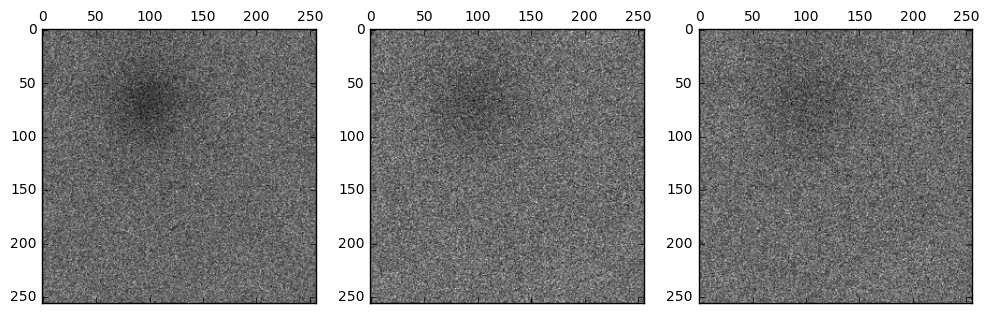

In [60]:
first_postbleach_frame = 2 #start counting at frame=0
all_frames = tiff_file.imread(data_directory+data_file)
postbleach_frame = np.flipud(all_frames[first_postbleach_frame])
fig,ax = pylab.subplots(1,3,figsize=(12,4))
ax[0].matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax[1].matshow(np.flipud(all_frames[first_postbleach_frame+10]),cmap=matplotlib.cm.gray, interpolation=None)
ax[2].matshow(np.flipud(all_frames[first_postbleach_frame+20]),cmap=matplotlib.cm.gray, interpolation=None)
plugins.connect(fig, plugins.MousePosition(fontsize=14))
print all_frames.shape

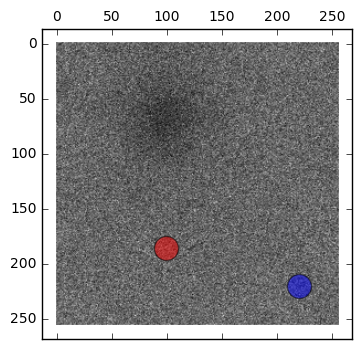

In [61]:
#Choose coordinates of the *center* of a bleached region
y_center_bleach = 186  # <------ you will need to change this for your data 
x_center_bleach = 99  # <------ you will need to change this for your data

#Choose coordinates of the *center* of some background region
y_center_bg = 220   # <------ you will need to change this for your data
x_center_bg = 220# <------ you will need to change this for your data

#Plotting just to make sure the coordinates above are appropriate
fig,ax = pylab.subplots()
ax.invert_yaxis()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax.scatter(x_center_bleach, y_center_bleach, s=300, alpha=0.5, c='r') #Red circle in bleach area
ax.scatter(x_center_bg, y_center_bg, s=300, alpha=0.5, c='b') #Blue circle outside bleach region

plugins.connect(fig, plugins.MousePosition(fontsize=14))

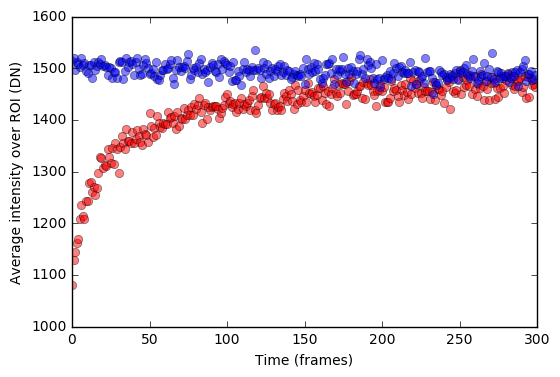

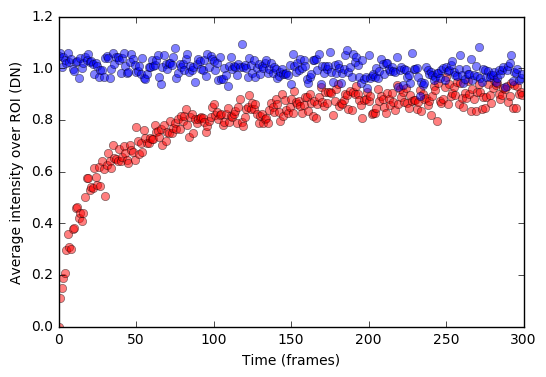

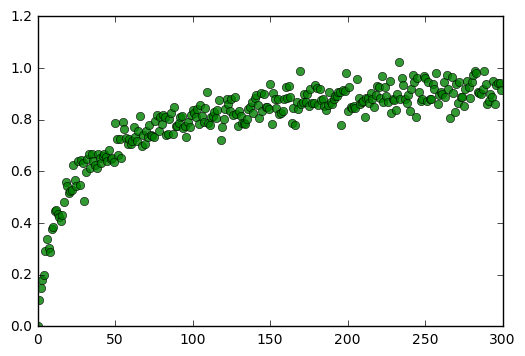

In [62]:
roi_size = 22
roi_bleach = np.array([[x_center_bleach-roi_size/2, x_center_bleach+roi_size/2],
                       [y_center_bleach-roi_size/2, y_center_bleach+roi_size/2]])
intensity_bleach_roi = all_frames[first_postbleach_frame:, 
                                  roi_bleach[1][0]:roi_bleach[1][1], 
                                  roi_bleach[0][0]:roi_bleach[0][1]].mean(axis=-1).mean(axis=-1)
pre_bleach_intensity = all_frames[:first_postbleach_frame, 
                                 roi_bleach[1][0]:roi_bleach[1][1], 
                                 roi_bleach[0][0]:roi_bleach[0][1]].mean()

roi_bg = np.array([[x_center_bg-roi_size/2, x_center_bg+roi_size/2],
                   [y_center_bg-roi_size/2, y_center_bg+roi_size/2]])
intensity_bg_roi = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean(axis=-1).mean(axis=-1)
pre_bg_intensity = all_frames[:first_postbleach_frame,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean()

bleach_region_signal_A = (intensity_bleach_roi-intensity_bleach_roi[0])/(pre_bleach_intensity-intensity_bleach_roi[0])
bg_region_signal_A = (intensity_bg_roi-intensity_bleach_roi[0])/(pre_bg_intensity-intensity_bleach_roi[0])

fig,ax = pylab.subplots()
ax.plot(intensity_bleach_roi,'ro',alpha=0.5)
ax.plot(intensity_bg_roi,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


fig,ax = pylab.subplots()
ax.plot(bleach_region_signal_A,'ro',alpha=0.5)
ax.plot(bg_region_signal_A,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


intensity_norm_A = bleach_region_signal_A/bg_region_signal_A

fig2,ax2 = pylab.subplots()
ax2.plot(intensity_norm_A,'go',alpha=0.8)

## Load in new data

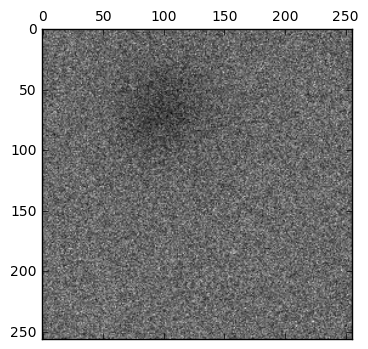

In [69]:
data_directory = "Z:\\2017-08-28_pnipam-xan\\0828rm03\\"
data_file = "20x_FRAP_DropPhase_002_ch1.tif"

first_postbleach_frame = 2 #start counting at frame=0
all_frames = tiff_file.imread(data_directory+data_file)
postbleach_frame = np.flipud(all_frames[first_postbleach_frame])
fig,ax = pylab.subplots()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

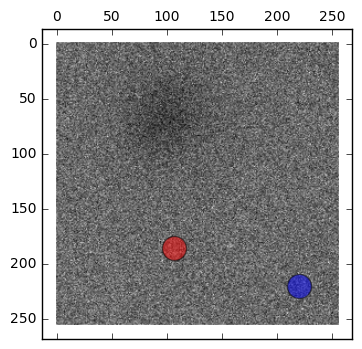

In [70]:
#Choose coordinates of the *center* of a bleached region
y_center_bleach = 186  # <------ you will need to change this for your data 
x_center_bleach = 106  # <------ you will need to change this for your data

#Choose coordinates of the *center* of some background region
y_center_bg = 220   # <------ you will need to change this for your data
x_center_bg = 220   # <------ you will need to change this for your data

fig,ax = pylab.subplots()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax.scatter(x_center_bleach, y_center_bleach, s=300, alpha=0.5, c='r') #Red circle in bleach area
ax.scatter(x_center_bg, y_center_bg, s=300, alpha=0.5, c='b') #Blue circle outside bleach region
plugins.connect(fig, plugins.MousePosition(fontsize=14))

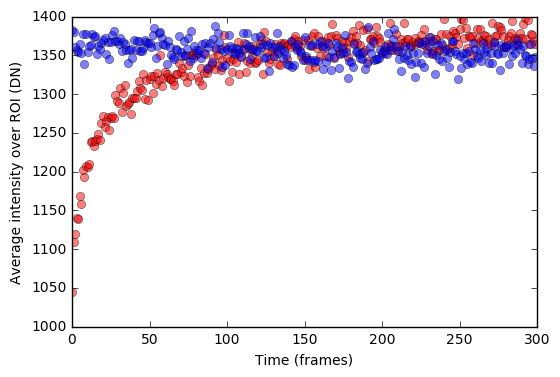

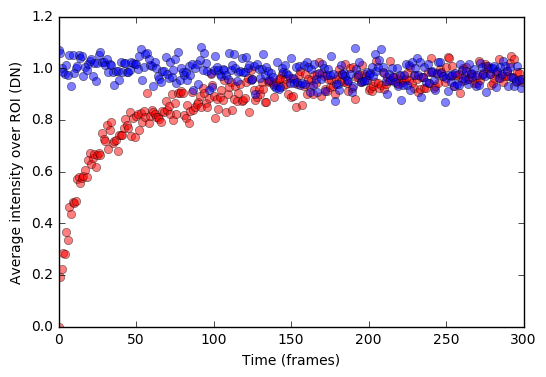

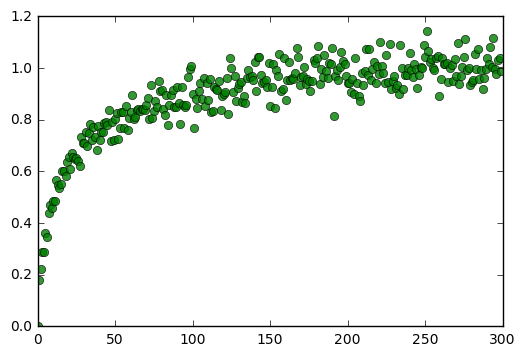

In [71]:
roi_size = 22
roi_bleach = np.array([[x_center_bleach-roi_size/2, x_center_bleach+roi_size/2],
                       [y_center_bleach-roi_size/2, y_center_bleach+roi_size/2]])
intensity_bleach_roi = all_frames[first_postbleach_frame:, 
                                  roi_bleach[1][0]:roi_bleach[1][1], 
                                  roi_bleach[0][0]:roi_bleach[0][1]].mean(axis=-1).mean(axis=-1)
pre_bleach_itensity = all_frames[:first_postbleach_frame, 
                                 roi_bleach[1][0]:roi_bleach[1][1], 
                                 roi_bleach[0][0]:roi_bleach[0][1]].mean()

roi_bg = np.array([[x_center_bg-roi_size/2, x_center_bg+roi_size/2],
                   [y_center_bg-roi_size/2, y_center_bg+roi_size/2]])
intensity_bg_roi = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean(axis=-1).mean(axis=-1)
pre_bg_intensity = all_frames[:first_postbleach_frame,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean()

bleach_region_signal_B = (intensity_bleach_roi-intensity_bleach_roi[0])/(pre_bleach_itensity-intensity_bleach_roi[0])
bg_region_signal_B = (intensity_bg_roi-intensity_bleach_roi[0])/(pre_bg_intensity-intensity_bleach_roi[0])

fig,ax = pylab.subplots()
ax.plot(intensity_bleach_roi,'ro',alpha=0.5)
ax.plot(intensity_bg_roi,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")

fig,ax = pylab.subplots()
ax.plot(bleach_region_signal_B,'ro',alpha=0.5)
ax.plot(bg_region_signal_B,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


intensity_norm_B = bleach_region_signal_B/bg_region_signal_B

fig2,ax2 = pylab.subplots()
ax2.plot(intensity_norm_B,'go',alpha=0.8)

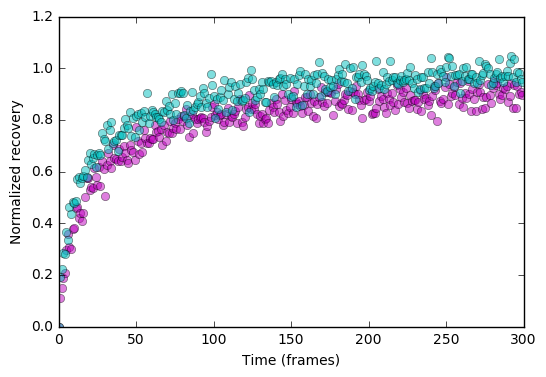

In [72]:
fig,ax = pylab.subplots()
ax.plot(bleach_region_signal_A,'mo',alpha=0.5)
ax.plot(bleach_region_signal_B,'co',alpha=0.5)

ax.set_xlabel("Time (frames)")
ax.set_ylabel("Normalized recovery")

Clearly, I should have taken longer movies.

In [73]:
def expFunc(params, time):
    return params[1]*(1-np.exp(-1.0*time/params[0]))

def errorFunc(params, time, data):
    return data-expFunc(params,time)

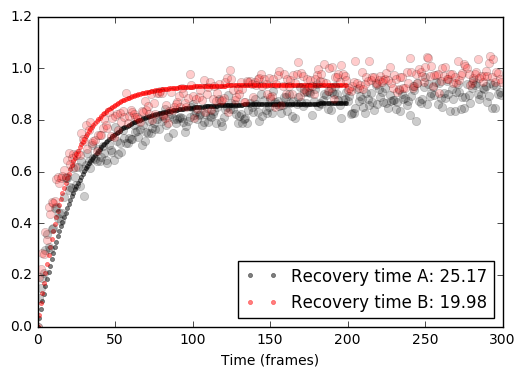

In [74]:
bestFitA,flat = leastsq(errorFunc, [10,0.6], args=(np.arange(len(bleach_region_signal_A)),bleach_region_signal_A))
bestFitB,flat = leastsq(errorFunc, [10,0.6], args=(np.arange(len(bleach_region_signal_B)),bleach_region_signal_B))

fig,ax = pylab.subplots()
times = np.arange(200)
ax.plot(times, expFunc(bestFitA,times),'k.',alpha=0.5,label="Recovery time A: %.2f" % bestFitA[0])
ax.plot(times, expFunc(bestFitB,times),'r.',alpha=0.5,label="Recovery time B: %.2f" % bestFitB[0])
ax.plot(bleach_region_signal_A,'ko',alpha=0.2)
ax.plot(bleach_region_signal_B,'ro',alpha=0.2)
ax.legend(loc=0)
ax.set_xlabel("Time (frames)")